# Tensorflow Demo

This section goes over how to build, train, and tune a model using the "tensorflow" library.

## Creating a basic sequential neural network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0  # Normalize the pixel values
y_train_full, y_test = to_categorical(y_train_full), to_categorical(y_test)  # One-hot encode the labels

# Split off a validation set from the training set
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

In [ ]:
y_train_full.shape

(60000, 10)

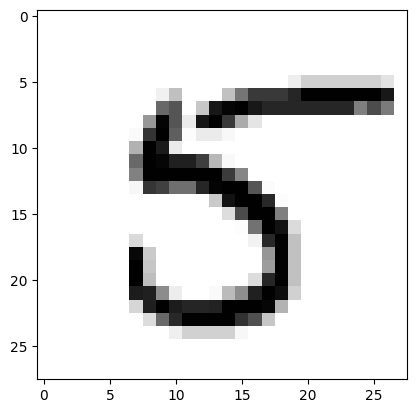

In [ ]:
# Plot the first image in the training set
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

## Building the architecture

In the basic list version, you list out your input layer, your hidden layers, and your output layer. In this example, we only have one hidden layer, and the output is using a "softmax" activation function since this is a multiclass problem.

In [ ]:
# Build a simple neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to a 784-element vector
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each class) and softmax activation
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compiling and training the model

Once you've selected your architecture, you can select your [optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers), [loss function](https://www.tensorflow.org/api_docs/python/tf/keras/losses), and what [metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) you want to keep track of while training. You can also create custom metrics.

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model and examining the results

To train the model itself, you use the "fit" function. You can also save the intermediate results of the fit function in a "history" object that keeps track of how the model performed over each epoch.

In [ ]:
x_train.shape

(48000, 28, 28)

In [ ]:
x_train.shape[0]/256

187.5

100352

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [ ]:
# Train the model and capture training history
history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_val, y_val))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7676 - loss: 0.8607 - val_accuracy: 0.9283 - val_loss: 0.2562
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9333 - loss: 0.2348 - val_accuracy: 0.9464 - val_loss: 0.1925
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9516 - loss: 0.1715 - val_accuracy: 0.9542 - val_loss: 0.1643
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9598 - loss: 0.1391 - val_accuracy: 0.9619 - val_loss: 0.1396
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9658 - loss: 0.1173 - val_accuracy: 0.9638 - val_loss: 0.1271
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9726 - loss: 0.0990 - val_accuracy: 0.9671 - val_loss: 0.1153
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9774 - loss: 0.0838 - val_accuracy: 0.9699 - val_loss: 0.1065
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9788 - loss: 0.0744 - val_accuracy: 0

## Graphing the output

You can examine the output using the history object and graphing the results. This allows you to see if you're overfitting the model or if you have enough capacity

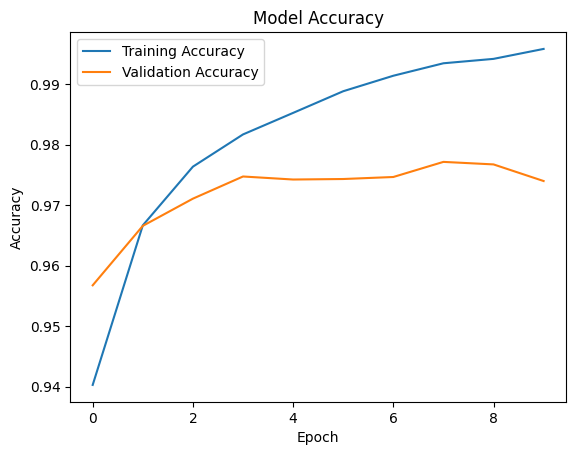

In [ ]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Using model.add() to dynamically add layers

Occassionally you'll want to add layers dynamically - in that case, it's better not to define a list and instead use tensorflow's "model.add()" function.

In [ ]:
# Build a neural network model layer-by-layer
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten 28x28 images to a 784-element vector
model.add(Dense(128, activation='relu'))  # Hidden layer with 128 neurons and ReLU activation
model.add(Dense(10, activation='softmax'))  # Output layer with 10 neurons and softmax activation

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=256, validation_data=(x_val, y_val))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


## Using Keras Tuner to tune the architecture

The built in method for hyperparameter tuning is "Keras Tuner": https://keras.io/api/keras_tuner/hyperparameters/

This method lets you choose a few different ways to tune your objects:



*   HyperParameters.Boolean(name, default=False, parent_name=None, parent_values=None)
      * Lets you use "true or false" as the search space
*   HyperParameters.Choice(name, values, ordered=None, default=None,parent_name=None, parent_values=None)
      * Select from a list of options
*   HyperParameters.Float(name,min_value,max_value,step=None,sampling="linear",default=None,parent_name=None,parent_values=None)
      * Search for a floating point (value with a decimal point) number, given a specific sampling strategy
*   HyperParameters.Int(name,min_value,max_value,step=None,sampling="linear",default=None,parent_name=None, parent_values=None)
      * Search for an integer number given a specific sampling strategy








In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.6 MB/s eta 0:00:00


### Building the hyperparameter search space

To define the search space, you need to create this "build_model" function. This is where you define the model, tell it what you want to tune, and add define how you want to search for those models.

In [ ]:
# Define the hypermodel
def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    # Tune the number of layers
    for i in range(hp.Int('num_layers', min_value=1, max_value=3)):  # Tuning 1-3 layers
        # Tune the number of neurons in each layer
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
                        activation=hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


## Selecting your tuning algorithm

Keras tuner has multiple available tuners:



1.   [**Random Search**](https://keras.io/api/keras_tuner/tuners/random/): Selects parameters at random.
2.   [**Grid Search**](https://keras.io/api/keras_tuner/tuners/grid/): Searches all available parameters in the search space. Guaranteed to get the best answer, but could take way too long if you're searching a lot of parameters and a very large space
3.   [**Bayesian Optimization**](https://keras.io/api/keras_tuner/tuners/bayesian/): Selects parameters by taking into account previous iterations of the algorithm and searching only in areas it knows it's been successful before. Faster than grid search, but can get stuck in local minima.
4.   [**Hyperband Optimization**](https://keras.io/api/keras_tuner/tuners/hyperband/): Runs multiple sets of parameters at the same time, but continues training on only the most successful ones. Faster than bayesian and tends to be fairly good


In [ ]:
from keras_tuner import Hyperband

# Initialize the Keras Tuner with Hyperband search
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='mnist_tuning'
)

## Search and selecting the best model

You can then choose to search for the best hyperparamters. This can take a very long time, especially depending on which optimization algorithm you chose, how you set it up, and how large your search space is.

In [ ]:
# Perform the search
tuner.search(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"Best model test accuracy: {test_accuracy * 100:.2f}%")

Trial 26 Complete [00h 00m 55s]
val_accuracy: 0.9779166579246521

Best val_accuracy So Far: 0.9824166893959045
Total elapsed time: 00h 32m 21s

Search: Running Trial #27

Value             |Best Value So Far |Hyperparameter
2                 |1                 |num_layers
224               |224               |units_0
relu              |relu              |activation_0
224               |96                |units_1
sigmoid           |sigmoid           |activation_1
10                |4                 |tuner/epochs
0                 |2                 |tuner/initial_epoch
0                 |2                 |tuner/bracket
0                 |1                 |tuner/round

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8530 - loss: 0.5172 - val_accuracy: 0.9567 - val_loss: 0.1451
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9673 - loss: 0.1111 - val_accuracy: 0.9703 - val_loss: 0.0986
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - acc

KeyboardInterrupt: 

# Pytorch

Pytorch loads its data a little differently - instead of directly inputting the data, we can use a "DataLoader" that will automatically batch, sample, and shuffle our data. In the below example, we've set the batch size to 64 and chosen to shuffle the training data, but not the test data since no training is being done and the order of the samples won't affect the results.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations for the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the images
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## Building the Architecture

In pytorch, you create the architecture by extending from a basic nn.Module class. You can then define the initial architecture in the "initialization" section, then define the activations in the "forward" function.

In [ ]:
# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)       # Second hidden layer
        self.fc3 = nn.Linear(64, 10)        # Output layer

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # No activation here because CrossEntropyLoss expects raw logits
        return x


## Creating the model and defining the loss and optimization

Just like before, once the architecture is set we can select the [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](https://pytorch.org/docs/stable/optim.html) we want to use, as well as set the learning rate for that optimizer.

In [ ]:
# Instantiate the model, define the loss function and the optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


## Training the model - method 1

In [ ]:
# Training loop
epochs = 5
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()         # Zero the gradients
        outputs = model(images)       # Forward pass
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()               # Backpropagation
        optimizer.step()              # Update the weights

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/5, Loss: 0.4039
Epoch 2/5, Loss: 0.1980
Epoch 3/5, Loss: 0.1468
Epoch 4/5, Loss: 0.1175
Epoch 5/5, Loss: 0.1005


In [ ]:
# Evaluation loop
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # No need to track gradients during evaluation
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1) # Creates predictions by selecting the output with the maximum softmax value
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 96.20%


### Training the model method 2 - creating test and training functions

You can make the code a bit more modular by creating functions for the train and evaluation functions. This also makes the code a little easier to read.

In [ ]:
# Define training function
def train(model, loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for X_batch, y_batch in loader:
        optimizer.zero_grad()               # Zero the gradients
        outputs = model(X_batch)            # Forward pass
        loss = criterion(outputs, y_batch)  # Calculate the loss
        loss.backward()                     # Backpropagation
        optimizer.step()                    # Update the weights

        running_loss += loss.item()
        _, predictions = torch.max(outputs, 1)            # Predict output
        correct += (predictions == y_batch).sum().item()  # Calculate the number of correct outputs
        total += y_batch.size(0)                          # Calculats the number of samples processed across all batches

    accuracy = 100 * correct / total
    avg_loss = running_loss / len(loader)
    return avg_loss, accuracy

This might also make it a bit easier to add in other performance metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define evaluation function
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad(): # No need to track gradients during evaluation
        for X_batch, y_batch in loader: # For each x and y in the loader
            outputs = model(X_batch)    # forward pass to create outputs
            _, predictions = torch.max(outputs, 1) # Make a prediction
            y_true.extend(y_batch.tolist())  # Add the batch's true values to the y_true list
            y_pred.extend(predictions.tolist()) # Add the predictions to the predictin list
            correct += (predictions == y_batch).sum().item()  # Calculate the number of true values
            total += y_batch.size(0)  # Sum up the total number of points in the batch

    # You can then get the current epoch's training metrics using all of the true and predicted values
    accuracy = 100 * correct / total
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

Once you have your metrics, you can then perform the training and evaluation per epoch much easier.

In [ ]:
# Track metrics
train_losses = []
train_accuracies = []
val_accuracies = []

# Training and evaluation loop
epochs = 5
for epoch in range(epochs):
    train_loss, train_accuracy = train(model, train_loader, criterion, optimizer)
    val_accuracy, val_precision, val_recall, val_f1 = evaluate(model, test_loader)

    # Append this epoch's losses and accuracies to the list
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Val Accuracy: {val_accuracy:.2f}%, "
          f"Precision: {val_precision:.2f}, Recall: {val_recall:.2f}, F1: {val_f1:.2f}")


Epoch 1/5, Train Loss: 0.4062, Train Accuracy: 88.00%, Val Accuracy: 92.38%, Precision: 0.93, Recall: 0.92, F1: 0.92
Epoch 2/5, Train Loss: 0.1968, Train Accuracy: 94.14%, Val Accuracy: 95.20%, Precision: 0.95, Recall: 0.95, F1: 0.95
Epoch 3/5, Train Loss: 0.1435, Train Accuracy: 95.69%, Val Accuracy: 95.93%, Precision: 0.96, Recall: 0.96, F1: 0.96
Epoch 4/5, Train Loss: 0.1175, Train Accuracy: 96.34%, Val Accuracy: 96.27%, Precision: 0.96, Recall: 0.96, F1: 0.96
Epoch 5/5, Train Loss: 0.1000, Train Accuracy: 96.85%, Val Accuracy: 96.37%, Precision: 0.96, Recall: 0.96, F1: 0.96


## Plotting the training

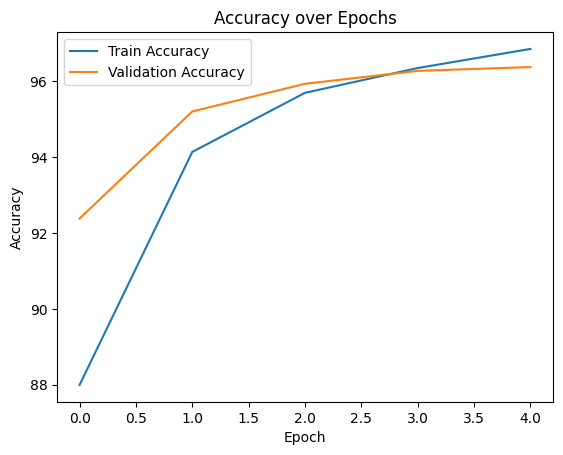

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

## Using tabular data

Just as an extra - for tabular data, the process is largely the same, you just have to ensure that you're converting your data into tensors prior to creating the data loaders. Also the output here is a sigmoid activation for binary classification, not softmax

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for training and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a simple feedforward neural network for tabular data
class TabularNN(nn.Module):
    def __init__(self, input_dim):
        super(TabularNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Instantiate the model, define loss function and optimizer
model = TabularNN(input_dim=X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define training function
def train(model, loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for X_batch, y_batch in loader:
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()          # Forward pass
        loss = criterion(outputs, y_batch.float())  # Calculate the loss
        loss.backward()                             # Backprop
        optimizer.step()                            # Update the gradients

        running_loss += loss.item()
        predictions = (outputs > 0.5).long()
        correct += (predictions == y_batch).sum().item()
        total += y_batch.size(0)

    accuracy = 100 * correct / total
    avg_loss = running_loss / len(loader)
    return avg_loss, accuracy

# Define evaluation function
def evaluate(model, loader):
    model.eval()                                    # Set to evaluation mode
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():                           # Do not update gradients
        for X_batch, y_batch in loader:
            outputs = model(X_batch).squeeze()      # Calculate outputs
            predictions = (outputs > 0.5).long()    # Convert to predictions
            y_true.extend(y_batch.tolist())
            y_pred.extend(predictions.tolist())
            correct += (predictions == y_batch).sum().item()
            total += y_batch.size(0)

    accuracy = 100 * correct / total
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Track training and validation metrics
train_losses = []
train_accuracies = []
val_accuracies = []

# Training and evaluation loop
epochs = 20
for epoch in range(epochs):
    train_loss, train_accuracy = train(model, train_loader, criterion, optimizer)
    val_accuracy, val_precision, val_recall, val_f1 = evaluate(model, test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Val Accuracy: {val_accuracy:.2f}%, "
          f"Precision: {val_precision:.2f}, Recall: {val_recall:.2f}, F1: {val_f1:.2f}")

# Plot training and validation accuracy over epochs
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

# Plot training loss over epochs
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()


## Hyperparameter Tuning with Ray Tune

There's a few different methods for performing hyperparameter tuning on pytorch models. [Ray Tune](https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html) seems to be one the developers recommend

In [ ]:
!pip install ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 MB 7.6 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler

# Define transformations for the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the images
])

# Load the MNIST training and test datasets
train_val_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Split train_val_dataset into training and validation sets (e.g., 90% train, 10% validation)
train_size = int(0.9 * len(train_val_dataset))
val_size = len(train_val_dataset) - train_size
train_dataset, val_dataset = random_split(train_val_dataset, [train_size, val_size])

# Define the PyTorch model
class SimpleNN(nn.Module):
    def __init__(self, config):
        super(SimpleNN, self).__init__()
        layers = [nn.Flatten()]
        in_features = 28 * 28
        for _ in range(config["n_layers"]):
            layers.append(nn.Linear(in_features, config["n_units"]))
            layers.append(nn.ReLU())
            in_features = config["n_units"]
        layers.append(nn.Linear(in_features, 10))  # Output layer for 10 classes
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Training function for Ray Tune
def train_mnist(config, checkpoint_dir=None):
    model = SimpleNN(config)
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=config["lr"])

    # Load data
    train_loader = DataLoader(train_dataset, batch_size=config["batch_size"], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=config["batch_size"], shuffle=False)

    # Training loop
    for epoch in range(5):  # Training for a few epochs
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

        # Validation accuracy
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == y_batch).sum().item()
                total += y_batch.size(0)

        val_accuracy = correct / total
        tune.report(mean_accuracy=val_accuracy)

# Hyperparameter tuning configuration
config = {
    "lr": tune.loguniform(1e-5, 1e-2),
    "batch_size": tune.choice([32, 64, 128]),
    "n_layers": tune.randint(1, 4),
    "n_units": tune.choice([32, 64, 128])
}

# Scheduler and Reporter for Ray Tune
scheduler = ASHAScheduler(
    metric="mean_accuracy",
    mode="max",
    max_t=5,  # Max epochs
    grace_period=1,
    reduction_factor=2
)

reporter = CLIReporter(
    metric_columns=["mean_accuracy", "training_iteration"]
)

# Run Ray Tune
analysis = tune.run(
    train_mnist,
    resources_per_trial={"cpu": 1, "gpu": 1 if torch.cuda.is_available() else 0},
    config=config,
    num_samples=20,  # Number of hyperparameter configurations to try
    scheduler=scheduler,
    progress_reporter=reporter
)

# Best hyperparameters
print("Best hyperparameters found were: ", analysis.best_config)

# Optional: Evaluate the best model on the test set
best_config = analysis.best_config

# Load the test set with the best batch size
test_loader = DataLoader(test_dataset, batch_size=best_config["batch_size"], shuffle=False)

# Define the best model and set it up for testing
best_model = SimpleNN(best_config).to(device)
optimizer = optim.Adam(best_model.parameters(), lr=best_config["lr"])

# Train the best model on the entire training dataset
def train_final_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

train_loader = DataLoader(train_dataset, batch_size=best_config["batch_size"], shuffle=True)
train_final_model(best_model, train_loader, criterion, optimizer)

# Evaluate on the test set
best_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = best_model(X_batch)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

test_accuracy = correct / total
print(f"Test Accuracy with best hyperparameters: {test_accuracy * 100:.2f}%")


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 574kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.27MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.22MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



2024-11-13 17:12:20,684	INFO worker.py:1819 -- Started a local Ray instance.
2024-11-13 17:12:22,432	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run(...)`.
2024-11-13 17:12:23,425	INFO tensorboardx.py:193 -- pip install "ray[tune]" to see TensorBoard files.
2024-11-13 17:12:23,427	WARNING callback.py:136 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`
2024-11-13 17:12:23,434	WARNING tune.py:902 -- AIR_VERBOSITY is set, ignoring passed-in ProgressReporter for now.


+--------------------------------------------------------------------+
| Configuration for experiment     train_mnist_2024-11-13_17-12-23   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        AsyncHyperBandScheduler           |
| Number of trials                 20                                |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_mnist_2024-11-13_17-12-23
(raylet) Warning: The actor ImplicitFunc is very large (91 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.

Trial status: 20 PENDING
Current time: 2024-11-13 17:12:47. Total running time: 23s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+---------------------------------------------------------------------

2024-11-13 17:13:39,497	ERROR tune_controller.py:1331 -- Trial task failed for trial train_mnist_72e7b_00000
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 904, in get_objects
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(AttributeError): ray::ImplicitFunc.train() (pid=1520, ip=172.28.0.12, actor_id=def06d42


Trial train_mnist_72e7b_00000 errored after 0 iterations at 2024-11-13 17:13:39. Total running time: 1min 16s
Error file: /tmp/ray/session_2024-11-13_17-12-15_277287_683/artifacts/2024-11-13_17-12-23/train_mnist_2024-11-13_17-12-23/driver_artifacts/train_mnist_72e7b_00000_0_batch_size=64,lr=0.0001,n_layers=2,n_units=128_2024-11-13_17-12-35/error.txt


2024-11-13 17:13:40,740	ERROR tune_controller.py:1331 -- Trial task failed for trial train_mnist_72e7b_00001
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 904, in get_objects
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(AttributeError): ray::ImplicitFunc.train() (pid=1519, ip=172.28.0.12, actor_id=50bcd4b8


Trial train_mnist_72e7b_00001 errored after 0 iterations at 2024-11-13 17:13:40. Total running time: 1min 17s
Error file: /tmp/ray/session_2024-11-13_17-12-15_277287_683/artifacts/2024-11-13_17-12-23/train_mnist_2024-11-13_17-12-23/driver_artifacts/train_mnist_72e7b_00001_1_batch_size=64,lr=0.0012,n_layers=3,n_units=128_2024-11-13_17-12-36/error.txt

Trial status: 2 ERROR | 18 PENDING
Current time: 2024-11-13 17:13:47. Total running time: 1min 23s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+------------------------------------------------------------------------------------------+
| Trial name                status              lr     batch_size     n_layers     n_units |
+------------------------------------------------------------------------------------------+
| train_mnist_72e7b_00002   PENDING    5.91159e-05            128            2          32 |
| train_mnist_72e7b_00003   PENDING    0.00611151              32            2         128 |
| train_mnist_72e7b_00004   PENDING  

2024-11-13 17:14:24,271	ERROR tune_controller.py:1331 -- Trial task failed for trial train_mnist_72e7b_00002
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 904, in get_objects
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(AttributeError): ray::ImplicitFunc.train() (pid=1854, ip=172.28.0.12, actor_id=aad8d377


Trial train_mnist_72e7b_00002 errored after 0 iterations at 2024-11-13 17:14:24. Total running time: 2min 0s
Error file: /tmp/ray/session_2024-11-13_17-12-15_277287_683/artifacts/2024-11-13_17-12-23/train_mnist_2024-11-13_17-12-23/driver_artifacts/train_mnist_72e7b_00002_2_batch_size=128,lr=0.0001,n_layers=2,n_units=32_2024-11-13_17-12-36/error.txt


2024-11-13 17:14:36,665	ERROR tune_controller.py:1331 -- Trial task failed for trial train_mnist_72e7b_00003
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 904, in get_objects
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(AttributeError): ray::ImplicitFunc.train() (pid=1859, ip=172.28.0.12, actor_id=ffc8017d


Trial train_mnist_72e7b_00003 errored after 0 iterations at 2024-11-13 17:14:36. Total running time: 2min 13s
Error file: /tmp/ray/session_2024-11-13_17-12-15_277287_683/artifacts/2024-11-13_17-12-23/train_mnist_2024-11-13_17-12-23/driver_artifacts/train_mnist_72e7b_00003_3_batch_size=32,lr=0.0061,n_layers=2,n_units=128_2024-11-13_17-12-37/error.txt

Trial train_mnist_72e7b_00004 started with configuration:
+--------------------------------------------------+
| Trial train_mnist_72e7b_00004 config             |
+--------------------------------------------------+
| batch_size                                   128 |
| lr                                       0.00223 |
| n_layers                                       2 |
| n_units                                       32 |
+--------------------------------------------------+

Trial status: 4 ERROR | 1 RUNNING | 15 PENDING
Current time: 2024-11-13 17:14:47. Total running time: 2min 23s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+------

2024-11-13 17:15:11,154	ERROR tune_controller.py:1331 -- Trial task failed for trial train_mnist_72e7b_00004
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 904, in get_objects
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(AttributeError): ray::ImplicitFunc.train() (pid=2134, ip=172.28.0.12, actor_id=85974033


Trial train_mnist_72e7b_00004 errored after 0 iterations at 2024-11-13 17:15:11. Total running time: 2min 47s
Error file: /tmp/ray/session_2024-11-13_17-12-15_277287_683/artifacts/2024-11-13_17-12-23/train_mnist_2024-11-13_17-12-23/driver_artifacts/train_mnist_72e7b_00004_4_batch_size=128,lr=0.0022,n_layers=2,n_units=32_2024-11-13_17-12-37/error.txt

Trial status: 5 ERROR | 1 RUNNING | 14 PENDING
Current time: 2024-11-13 17:15:17. Total running time: 2min 53s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+------------------------------------------------------------------------------------------+
| Trial name                status              lr     batch_size     n_layers     n_units |
+------------------------------------------------------------------------------------------+
| train_mnist_72e7b_00005   RUNNING    0.00289927             128            3          32 |
| train_mnist_72e7b_00006   PENDING    0.0008884               32            1          64 |
| train_mnist_72e7b_00007

2024-11-13 17:15:24,793	ERROR tune_controller.py:1331 -- Trial task failed for trial train_mnist_72e7b_00005
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 904, in get_objects
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(AttributeError): ray::ImplicitFunc.train() (pid=2253, ip=172.28.0.12, actor_id=6452d141


Trial train_mnist_72e7b_00005 errored after 0 iterations at 2024-11-13 17:15:24. Total running time: 3min 1s
Error file: /tmp/ray/session_2024-11-13_17-12-15_277287_683/artifacts/2024-11-13_17-12-23/train_mnist_2024-11-13_17-12-23/driver_artifacts/train_mnist_72e7b_00005_5_batch_size=128,lr=0.0029,n_layers=3,n_units=32_2024-11-13_17-12-38/error.txt

Trial train_mnist_72e7b_00007 started with configuration:
+--------------------------------------------------+
| Trial train_mnist_72e7b_00007 config             |
+--------------------------------------------------+
| batch_size                                   128 |
| lr                                       0.00024 |
| n_layers                                       1 |
| n_units                                       32 |
+--------------------------------------------------+

Trial status: 6 ERROR | 2 RUNNING | 12 PENDING
Current time: 2024-11-13 17:15:47. Total running time: 3min 23s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+-------

2024-11-13 17:16:02,377	ERROR tune_controller.py:1331 -- Trial task failed for trial train_mnist_72e7b_00006
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 904, in get_objects
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(AttributeError): ray::ImplicitFunc.train() (pid=2453, ip=172.28.0.12, actor_id=279ee46b


Trial train_mnist_72e7b_00006 errored after 0 iterations at 2024-11-13 17:16:02. Total running time: 3min 38s
Error file: /tmp/ray/session_2024-11-13_17-12-15_277287_683/artifacts/2024-11-13_17-12-23/train_mnist_2024-11-13_17-12-23/driver_artifacts/train_mnist_72e7b_00006_6_batch_size=32,lr=0.0009,n_layers=1,n_units=64_2024-11-13_17-12-38/error.txt


2024-11-13 17:16:10,906	ERROR tune_controller.py:1331 -- Trial task failed for trial train_mnist_72e7b_00007
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 904, in get_objects
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(AttributeError): ray::ImplicitFunc.train() (pid=2576, ip=172.28.0.12, actor_id=47fe556c


Trial train_mnist_72e7b_00007 errored after 0 iterations at 2024-11-13 17:16:10. Total running time: 3min 47s
Error file: /tmp/ray/session_2024-11-13_17-12-15_277287_683/artifacts/2024-11-13_17-12-23/train_mnist_2024-11-13_17-12-23/driver_artifacts/train_mnist_72e7b_00007_7_batch_size=128,lr=0.0002,n_layers=1,n_units=32_2024-11-13_17-12-39/error.txt

Trial train_mnist_72e7b_00008 started with configuration:
+--------------------------------------------------+
| Trial train_mnist_72e7b_00008 config             |
+--------------------------------------------------+
| batch_size                                    64 |
| lr                                       0.00366 |
| n_layers                                       3 |
| n_units                                       32 |
+--------------------------------------------------+

Trial status: 8 ERROR | 1 RUNNING | 11 PENDING
Current time: 2024-11-13 17:16:17. Total running time: 3min 54s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+------

2024-11-13 17:16:50,413	ERROR tune_controller.py:1331 -- Trial task failed for trial train_mnist_72e7b_00008
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 904, in get_objects
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(AttributeError): ray::ImplicitFunc.train() (pid=2793, ip=172.28.0.12, actor_id=80e93d6f


Trial train_mnist_72e7b_00008 errored after 0 iterations at 2024-11-13 17:16:50. Total running time: 4min 26s
Error file: /tmp/ray/session_2024-11-13_17-12-15_277287_683/artifacts/2024-11-13_17-12-23/train_mnist_2024-11-13_17-12-23/driver_artifacts/train_mnist_72e7b_00008_8_batch_size=64,lr=0.0037,n_layers=3,n_units=32_2024-11-13_17-12-39/error.txt


2024-11-13 17:17:03,233	ERROR tune_controller.py:1331 -- Trial task failed for trial train_mnist_72e7b_00009
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 904, in get_objects
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(AttributeError): ray::ImplicitFunc.train() (pid=2893, ip=172.28.0.12, actor_id=b3c56975


Trial train_mnist_72e7b_00009 errored after 0 iterations at 2024-11-13 17:17:03. Total running time: 4min 39s
Error file: /tmp/ray/session_2024-11-13_17-12-15_277287_683/artifacts/2024-11-13_17-12-23/train_mnist_2024-11-13_17-12-23/driver_artifacts/train_mnist_72e7b_00009_9_batch_size=32,lr=0.0001,n_layers=3,n_units=32_2024-11-13_17-12-40/error.txt

Trial train_mnist_72e7b_00010 started with configuration:
+--------------------------------------------------+
| Trial train_mnist_72e7b_00010 config             |
+--------------------------------------------------+
| batch_size                                    32 |
| lr                                       0.00281 |
| n_layers                                       2 |
| n_units                                      128 |
+--------------------------------------------------+

Trial train_mnist_72e7b_00011 started with configuration:
+------------------------------------------------+
| Trial train_mnist_72e7b_00011 config           |
+---

2024-11-13 17:17:48,335	ERROR tune_controller.py:1331 -- Trial task failed for trial train_mnist_72e7b_00010
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 904, in get_objects
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(AttributeError): ray::ImplicitFunc.train() (pid=3120, ip=172.28.0.12, actor_id=26af1e1b


Trial train_mnist_72e7b_00010 errored after 0 iterations at 2024-11-13 17:17:48. Total running time: 5min 24s
Error file: /tmp/ray/session_2024-11-13_17-12-15_277287_683/artifacts/2024-11-13_17-12-23/train_mnist_2024-11-13_17-12-23/driver_artifacts/train_mnist_72e7b_00010_10_batch_size=32,lr=0.0028,n_layers=2,n_units=128_2024-11-13_17-12-40/error.txt


2024-11-13 17:17:54,278	ERROR tune_controller.py:1331 -- Trial task failed for trial train_mnist_72e7b_00011
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 904, in get_objects
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(AttributeError): ray::ImplicitFunc.train() (pid=3238, ip=172.28.0.12, actor_id=2921a76e


Trial train_mnist_72e7b_00011 errored after 0 iterations at 2024-11-13 17:17:54. Total running time: 5min 30s
Error file: /tmp/ray/session_2024-11-13_17-12-15_277287_683/artifacts/2024-11-13_17-12-23/train_mnist_2024-11-13_17-12-23/driver_artifacts/train_mnist_72e7b_00011_11_batch_size=64,lr=0.0000,n_layers=3,n_units=128_2024-11-13_17-12-41/error.txt

Trial train_mnist_72e7b_00012 started with configuration:
+------------------------------------------------+
| Trial train_mnist_72e7b_00012 config           |
+------------------------------------------------+
| batch_size                                  32 |
| lr                                       2e-05 |
| n_layers                                     1 |
| n_units                                     64 |
+------------------------------------------------+

Trial train_mnist_72e7b_00013 started with configuration:
+------------------------------------------------+
| Trial train_mnist_72e7b_00013 config           |
+-----------------

2024-11-13 17:18:38,025	ERROR tune_controller.py:1331 -- Trial task failed for trial train_mnist_72e7b_00012
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 904, in get_objects
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(AttributeError): ray::ImplicitFunc.train() (pid=3483, ip=172.28.0.12, actor_id=cf345de5


Trial train_mnist_72e7b_00012 errored after 0 iterations at 2024-11-13 17:18:38. Total running time: 6min 14s
Error file: /tmp/ray/session_2024-11-13_17-12-15_277287_683/artifacts/2024-11-13_17-12-23/train_mnist_2024-11-13_17-12-23/driver_artifacts/train_mnist_72e7b_00012_12_batch_size=32,lr=0.0000,n_layers=1,n_units=64_2024-11-13_17-12-41/error.txt

Trial status: 13 ERROR | 1 RUNNING | 6 PENDING
Current time: 2024-11-13 17:18:47. Total running time: 6min 24s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+------------------------------------------------------------------------------------------+
| Trial name                status              lr     batch_size     n_layers     n_units |
+------------------------------------------------------------------------------------------+
| train_mnist_72e7b_00013   RUNNING    3.86109e-05             32            3         128 |
| train_mnist_72e7b_00014   PENDING    0.000190781             64            2          64 |
| train_mnist_72e7b_00015

2024-11-13 17:18:51,300	ERROR tune_controller.py:1331 -- Trial task failed for trial train_mnist_72e7b_00013
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 904, in get_objects
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(AttributeError): ray::ImplicitFunc.train() (pid=3569, ip=172.28.0.12, actor_id=10883131


Trial train_mnist_72e7b_00013 errored after 0 iterations at 2024-11-13 17:18:51. Total running time: 6min 27s
Error file: /tmp/ray/session_2024-11-13_17-12-15_277287_683/artifacts/2024-11-13_17-12-23/train_mnist_2024-11-13_17-12-23/driver_artifacts/train_mnist_72e7b_00013_13_batch_size=32,lr=0.0000,n_layers=3,n_units=128_2024-11-13_17-12-42/error.txt

Trial train_mnist_72e7b_00014 started with configuration:
+--------------------------------------------------+
| Trial train_mnist_72e7b_00014 config             |
+--------------------------------------------------+
| batch_size                                    64 |
| lr                                       0.00019 |
| n_layers                                       2 |
| n_units                                       64 |
+--------------------------------------------------+

Trial train_mnist_72e7b_00015 started with configuration:
+--------------------------------------------------+
| Trial train_mnist_72e7b_00015 config             

2024-11-13 17:19:27,909	ERROR tune_controller.py:1331 -- Trial task failed for trial train_mnist_72e7b_00014
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 904, in get_objects
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(AttributeError): ray::ImplicitFunc.train() (pid=3818, ip=172.28.0.12, actor_id=2b06190e


Trial train_mnist_72e7b_00014 errored after 0 iterations at 2024-11-13 17:19:27. Total running time: 7min 4s
Error file: /tmp/ray/session_2024-11-13_17-12-15_277287_683/artifacts/2024-11-13_17-12-23/train_mnist_2024-11-13_17-12-23/driver_artifacts/train_mnist_72e7b_00014_14_batch_size=64,lr=0.0002,n_layers=2,n_units=64_2024-11-13_17-12-42/error.txt


2024-11-13 17:19:40,672	ERROR tune_controller.py:1331 -- Trial task failed for trial train_mnist_72e7b_00015
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 904, in get_objects
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(AttributeError): ray::ImplicitFunc.train() (pid=3936, ip=172.28.0.12, actor_id=41e6b308


Trial train_mnist_72e7b_00015 errored after 0 iterations at 2024-11-13 17:19:40. Total running time: 7min 17s
Error file: /tmp/ray/session_2024-11-13_17-12-15_277287_683/artifacts/2024-11-13_17-12-23/train_mnist_2024-11-13_17-12-23/driver_artifacts/train_mnist_72e7b_00015_15_batch_size=128,lr=0.0001,n_layers=3,n_units=128_2024-11-13_17-12-43/error.txt

Trial train_mnist_72e7b_00016 started with configuration:
+--------------------------------------------------+
| Trial train_mnist_72e7b_00016 config             |
+--------------------------------------------------+
| batch_size                                    32 |
| lr                                       0.00018 |
| n_layers                                       3 |
| n_units                                      128 |
+--------------------------------------------------+

Trial status: 16 ERROR | 1 RUNNING | 3 PENDING
Current time: 2024-11-13 17:19:47. Total running time: 7min 24s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+----

2024-11-13 17:20:26,477	ERROR tune_controller.py:1331 -- Trial task failed for trial train_mnist_72e7b_00016
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 904, in get_objects
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(AttributeError): ray::ImplicitFunc.train() (pid=4153, ip=172.28.0.12, actor_id=710791ed


Trial train_mnist_72e7b_00016 errored after 0 iterations at 2024-11-13 17:20:26. Total running time: 8min 3s
Error file: /tmp/ray/session_2024-11-13_17-12-15_277287_683/artifacts/2024-11-13_17-12-23/train_mnist_2024-11-13_17-12-23/driver_artifacts/train_mnist_72e7b_00016_16_batch_size=32,lr=0.0002,n_layers=3,n_units=128_2024-11-13_17-12-43/error.txt


2024-11-13 17:20:34,351	ERROR tune_controller.py:1331 -- Trial task failed for trial train_mnist_72e7b_00017
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 904, in get_objects
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(AttributeError): ray::ImplicitFunc.train() (pid=4266, ip=172.28.0.12, actor_id=2a82b730


Trial train_mnist_72e7b_00017 errored after 0 iterations at 2024-11-13 17:20:34. Total running time: 8min 10s
Error file: /tmp/ray/session_2024-11-13_17-12-15_277287_683/artifacts/2024-11-13_17-12-23/train_mnist_2024-11-13_17-12-23/driver_artifacts/train_mnist_72e7b_00017_17_batch_size=64,lr=0.0005,n_layers=3,n_units=128_2024-11-13_17-12-44/error.txt

Trial train_mnist_72e7b_00018 started with configuration:
+------------------------------------------------+
| Trial train_mnist_72e7b_00018 config           |
+------------------------------------------------+
| batch_size                                  32 |
| lr                                       6e-05 |
| n_layers                                     3 |
| n_units                                     32 |
+------------------------------------------------+

Trial train_mnist_72e7b_00019 started with configuration:
+--------------------------------------------------+
| Trial train_mnist_72e7b_00019 config             |
+-------------

2024-11-13 17:21:20,279	ERROR tune_controller.py:1331 -- Trial task failed for trial train_mnist_72e7b_00018
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 2753, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
  File "/usr/local/lib/python3.10/dist-packages/ray/_private/worker.py", line 904, in get_objects
    raise value.as_instanceof_cause()
ray.exceptions.RayTaskError(AttributeError): ray::ImplicitFunc.train() (pid=4519, ip=172.28.0.12, actor_id=8998bd67


Trial train_mnist_72e7b_00018 errored after 0 iterations at 2024-11-13 17:21:20. Total running time: 8min 56s
Error file: /tmp/ray/session_2024-11-13_17-12-15_277287_683/artifacts/2024-11-13_17-12-23/train_mnist_2024-11-13_17-12-23/driver_artifacts/train_mnist_72e7b_00018_18_batch_size=32,lr=0.0001,n_layers=3,n_units=32_2024-11-13_17-12-44/error.txt

Trial train_mnist_72e7b_00019 errored after 0 iterations at 2024-11-13 17:21:20. Total running time: 8min 56s
Error file: /tmp/ray/session_2024-11-13_17-12-15_277287_683/artifacts/2024-11-13_17-12-23/train_mnist_2024-11-13_17-12-23/driver_artifacts/train_mnist_72e7b_00019_19_batch_size=128,lr=0.0002,n_layers=1,n_units=64_2024-11-13_17-12-45/error.txt

Trial status: 20 ERROR
Current time: 2024-11-13 17:21:20. Total running time: 8min 56s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
+------------------------------------------------------------------------------------------+
| Trial name                status              lr     batch_size  

TuneError: ('Trials did not complete', [train_mnist_72e7b_00000, train_mnist_72e7b_00001, train_mnist_72e7b_00002, train_mnist_72e7b_00003, train_mnist_72e7b_00004, train_mnist_72e7b_00005, train_mnist_72e7b_00006, train_mnist_72e7b_00007, train_mnist_72e7b_00008, train_mnist_72e7b_00009, train_mnist_72e7b_00010, train_mnist_72e7b_00011, train_mnist_72e7b_00012, train_mnist_72e7b_00013, train_mnist_72e7b_00014, train_mnist_72e7b_00015, train_mnist_72e7b_00016, train_mnist_72e7b_00017, train_mnist_72e7b_00018, train_mnist_72e7b_00019])

# Other Resources

# 6 - Useful Resources


## Textbooks

-	Géron, Aurélien. *Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow*. " O'Reilly Media, Inc.", 2022.
-	Hastie, Trevor, et al. *The elements of statistical learning: data mining, inference, and prediction*. Vol. 2. New York: springer, 2009.
-	Goodfellow, Ian, Yoshua Bengio, and Aaron Courville. [*Deep learning*](https://www.deeplearningbook.org/). MIT press, 2016.
-	Parr, Terence, and Jeremy Howard. ["*The matrix calculus you need for deep learning.*"](https://arxiv.org/abs/1802.01528) arXiv preprint arXiv:1802.01528 (2018).




## Websites
-	[Hand's on machine learning Github Repository](https://github.com/ageron/handson-ml2) - a series of Jupyter notebooks that includes example code for extremely important concepts.
-	[Machine Learning Mastery](https://machinelearningmastery.com/) - A blog that covers almost every possible topic and includes example codes, links to papers, and more. Code mostly written in Python, with some entries in R.
-	[Papers with Code](https://paperswithcode.com/) - a website that contains links to research papers and their code.
- [kaggle](https://www.kaggle.com/) - a website for data science competitions, as well as free learning modules in a variety of machine learning topics
-	[AI2ES](https://www.ai2es.org/products/education/) - a research group mostly focused on machine learning in weather, but that has extremely useful resources.

## Other
- [Anaconda](https://www.anaconda.com/) - a data science application that includes software and a package manager, as well as pre-installed basic packages used for machine learning.